In [1]:
# 04_hierarchical_demo.ipynb (Python Code exportiert als Skript zur Vorlage)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from planners.visibility_prm import VisibilityPRM
from planners.hierarchical_planner import HierarchicalPlanner
from planners.lazy_prm import LazyPRM
from planners.basic_prm import BasicPRM
from utils.visibility_prm_visualize import visibility_prm_visualize
from utils.hierarchical_visualize import visualize_hierarchical_planning
from utils.collision_checker import CollisionChecker
from environment import get_all_scenes
import time
import pandas as pd
from scipy.spatial.distance import euclidean

In [2]:
# ---- Konfiguration für den globalen Planer (VisibilityPRM) ----
config_high = {
    "ntry": 30
}

config_low_lazy = {
    "initialRoadmapSize": 20,
    "updateRoadmapSize": 10,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 50,
    "radius": 4
}


🔁 Starte Benchmarks mit Subplanner: Lazy

🔍 Szene: U-Shape
Globaler Pfad: ['start', 23, 4, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([ 1.96780584, 17.42563162]), array([5.29397992, 1.43789476]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [ 1.96780584 17.42563162]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [ 1.96780584 17.42563162]
   Lokale Begrenzung (geclipped): ((0, np.float64(4.5584725929462575)), (np.float64(16.138246135645478), np.float64(21.287385485915753)))
Segment 1: [ 1.96780584 17.42563162] → [5.29397992 1.43789476]
→ Lokaler Planner für Segment 1: [ 1.96780584 17.42563162] → [5.29397992 1.43789476]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.630892877577566)), (np.float64(1.4317631902350403), np.float64(17.43176319023504)))
Segment 2: [5.29397992 1.43789476] → [20.0, 2.0]
→ Lokaler Planner für Segment 2: [5.29397992 1.43789476] → [20.0, 2.0]
   Lokale Begrenzung (geclipped): ((np.float64(4.646989959766444), np.float64(20.646989959766444)), (0, np

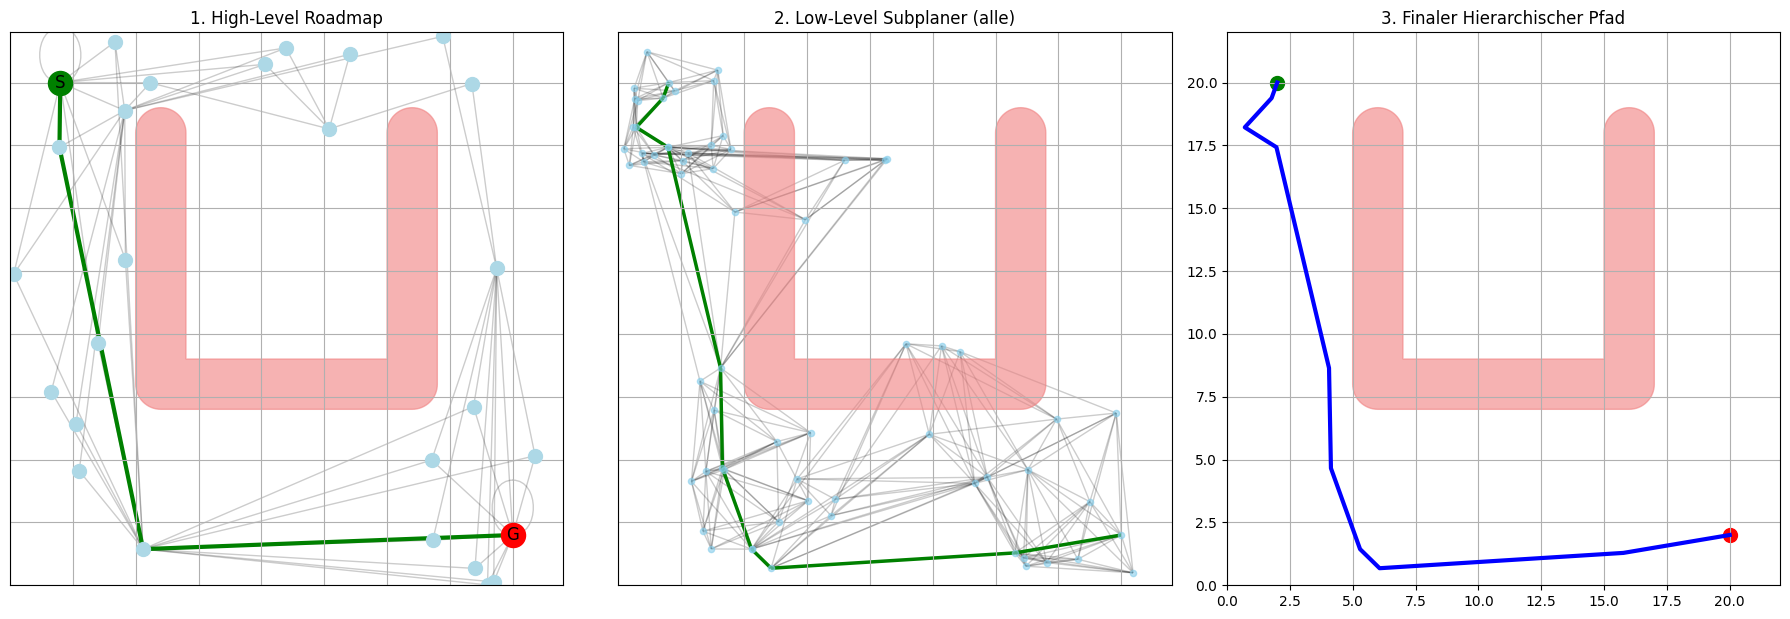

✅ Plot gespeichert: plots_hierarchical\U-Shape_Hierarchical-Lazy.png

🔍 Szene: L-Shape
Globaler Pfad: ['start', 22, 2, 54, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([ 2.84711825, 18.74241035]), array([10.46512514, 21.98773729]), array([16.45669813, 15.94788084]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [ 2.84711825 18.74241035]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [ 2.84711825 18.74241035]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.42355912420189)), (np.float64(2.37120517722475), np.float64(18.371205177224752)))
Segment 1: [ 2.84711825 18.74241035] → [10.46512514 21.98773729]
→ Lokaler Planner für Segment 1: [ 2.84711825 18.74241035] → [10.46512514 21.98773729]
   Lokale Begrenzung (geclipped): ((0, np.float64(14.656121695673258)), (np.float64(12.365073823650317), 22))
Segment 2: [10.46512514 21.98773729] → [16.45669813 15.94788084]
→ Lokaler Planner für Segment 2: [10.46512514 21.98773729] → [16.45669813 15.94788084]
   Lokale Begrenzung (geclipped): 

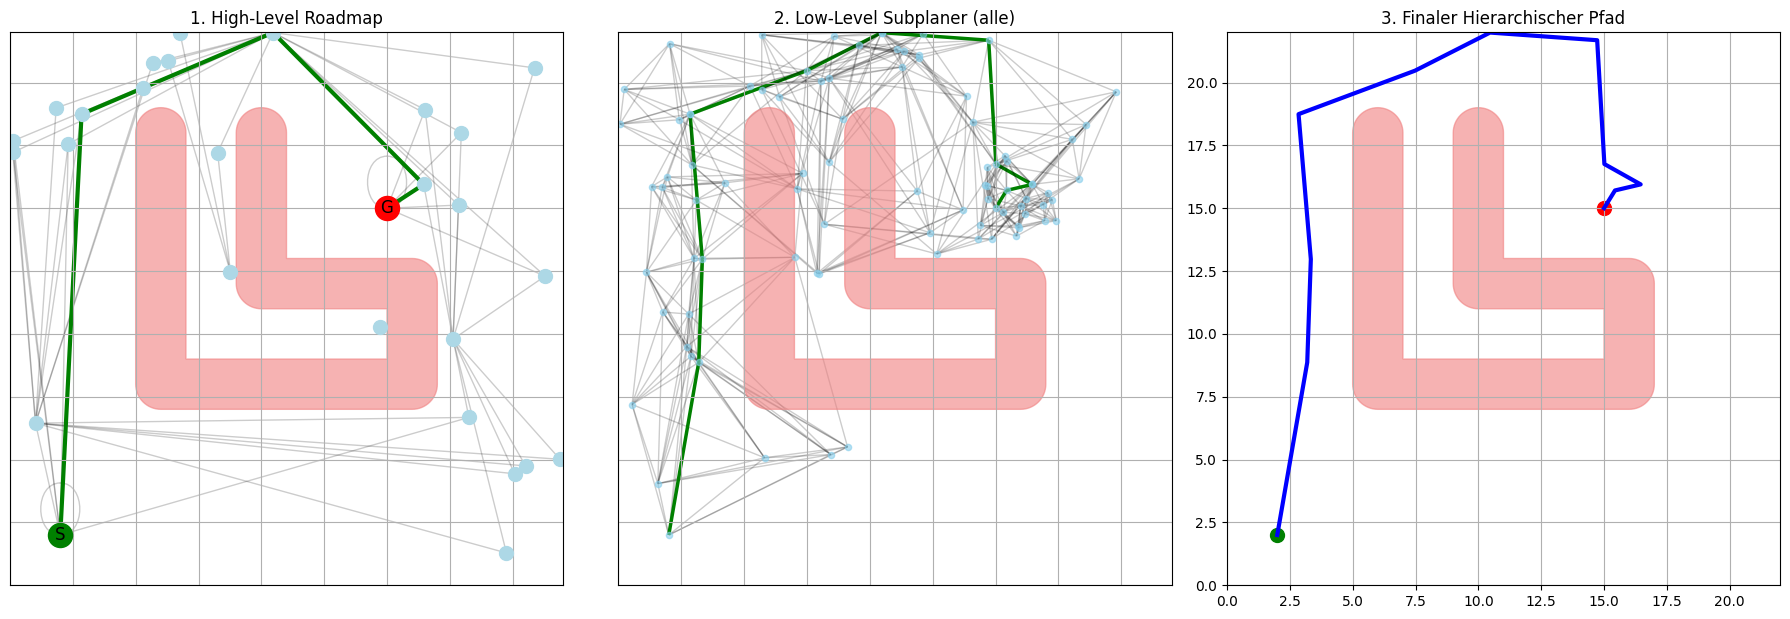

✅ Plot gespeichert: plots_hierarchical\L-Shape_Hierarchical-Lazy.png

🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Globaler Pfad: ['start', 0, 7, 6, 15, 1, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([ 4.28588351, 13.4799001 ]), array([ 6.85964068, 14.50136942]), array([ 0.34769176, 21.55280136]), array([19.00251158, 18.57063959]), array([15.77566983,  3.94066081]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [ 4.28588351 13.4799001 ]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [ 4.28588351 13.4799001 ]
   Lokale Begrenzung (geclipped): ((0, np.float64(12.642941756672624)), (np.float64(1.2399500479118597), np.float64(17.23995004791186)))
Segment 1: [ 4.28588351 13.4799001 ] → [ 6.85964068 14.50136942]
→ Lokaler Planner für Segment 1: [ 4.28588351 13.4799001 ] → [ 6.85964068 14.50136942]
   Lokale Begrenzung (geclipped): ((np.float64(2.803714328089901), np.float64(8.341809868366221)), (np.float64(11

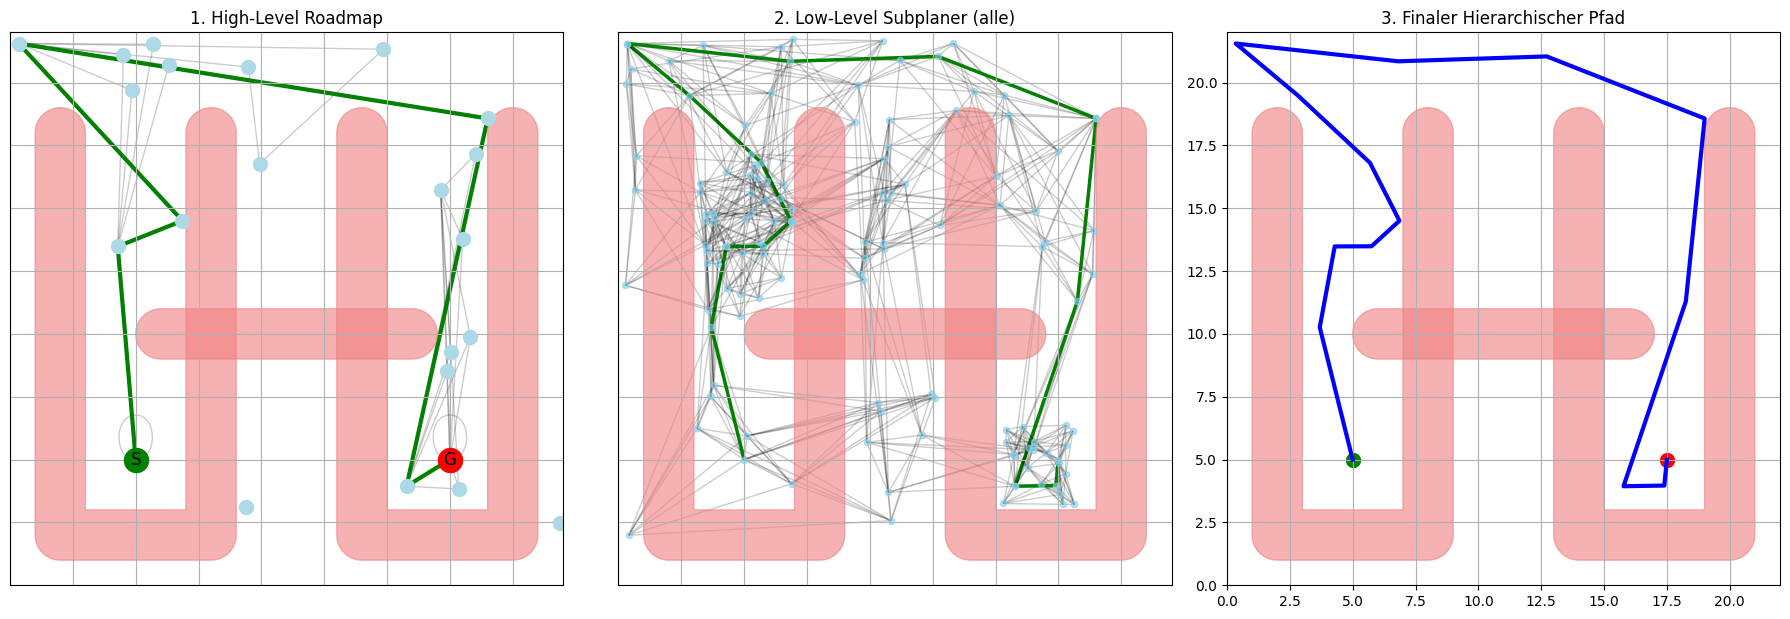

✅ Plot gespeichert: plots_hierarchical\Complex_Shape_Hierarchical-Lazy.png

🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 43, 0, 26, 1, 21, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([3.50473431, 0.00522707]), array([15.82819989,  1.36013454]), array([19.57218008,  1.04304294]), array([19.4987784 , 12.68998876]), array([19.53332927, 20.64519291]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [3.50473431 0.00522707]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [3.50473431 0.00522707]
   Lokale Begrenzung (geclipped): ((0, np.float64(4.9474120837775555)), (0, np.float64(3.1976584612002705)))
Segment 1: [3.50473431 0.00522707] → [15.82819989  1.36013454]
→ Lokaler Planner für Segment 1: [3.50473431 0.00522707] → [15.82819989  1.36013454]
   Lokale Begrenzung (geclipped): ((np.float64(1.6664671028885216), np.float64(17.66646710288852)), (0, np.float64(8.682680802030879)))
❌ Keine lokale Verbindung zwischen [3.50473431 0.00522707] und [15.82819989  1.36013454].
❌ Kein Pfad g

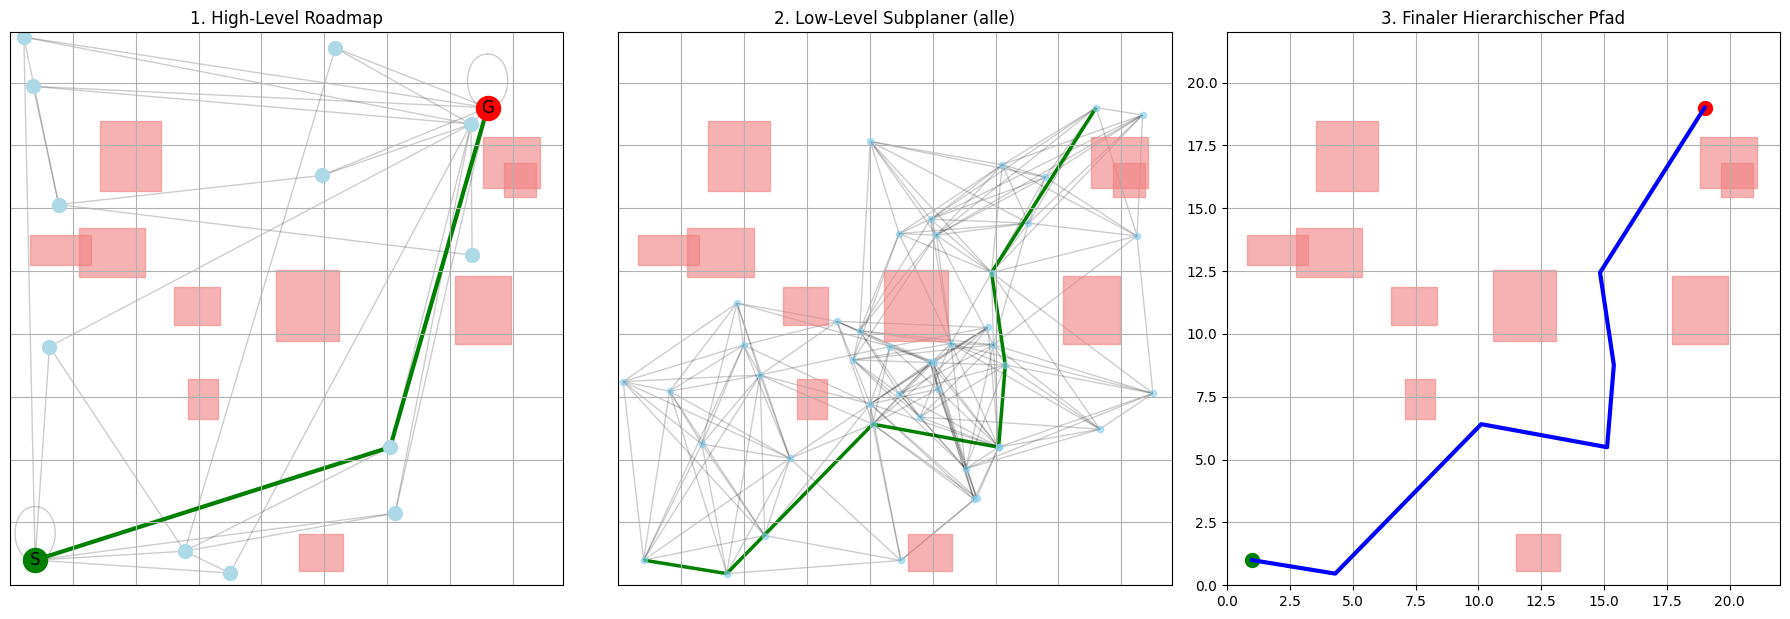

✅ Plot gespeichert: plots_hierarchical\Random_Obstacles_Hierarchical-Lazy.png

🔁 Starte Benchmarks mit Subplanner: Basic

🔍 Szene: U-Shape
Globaler Pfad: ['start', 39, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([3.54675922, 6.60219089]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [3.54675922 6.60219089]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [3.54675922 6.60219089]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.77337960845526)), (np.float64(5.3010954458503186), np.float64(21.30109544585032)))
Segment 1: [3.54675922 6.60219089] → [20.0, 2.0]
→ Lokaler Planner für Segment 1: [3.54675922 6.60219089] → [20.0, 2.0]
   Lokale Begrenzung (geclipped): ((np.float64(3.7733796084552615), np.float64(19.77337960845526)), (0, np.float64(12.301095445850319)))
✅ Pfad gefunden in Szene: U-Shape, Länge: 18


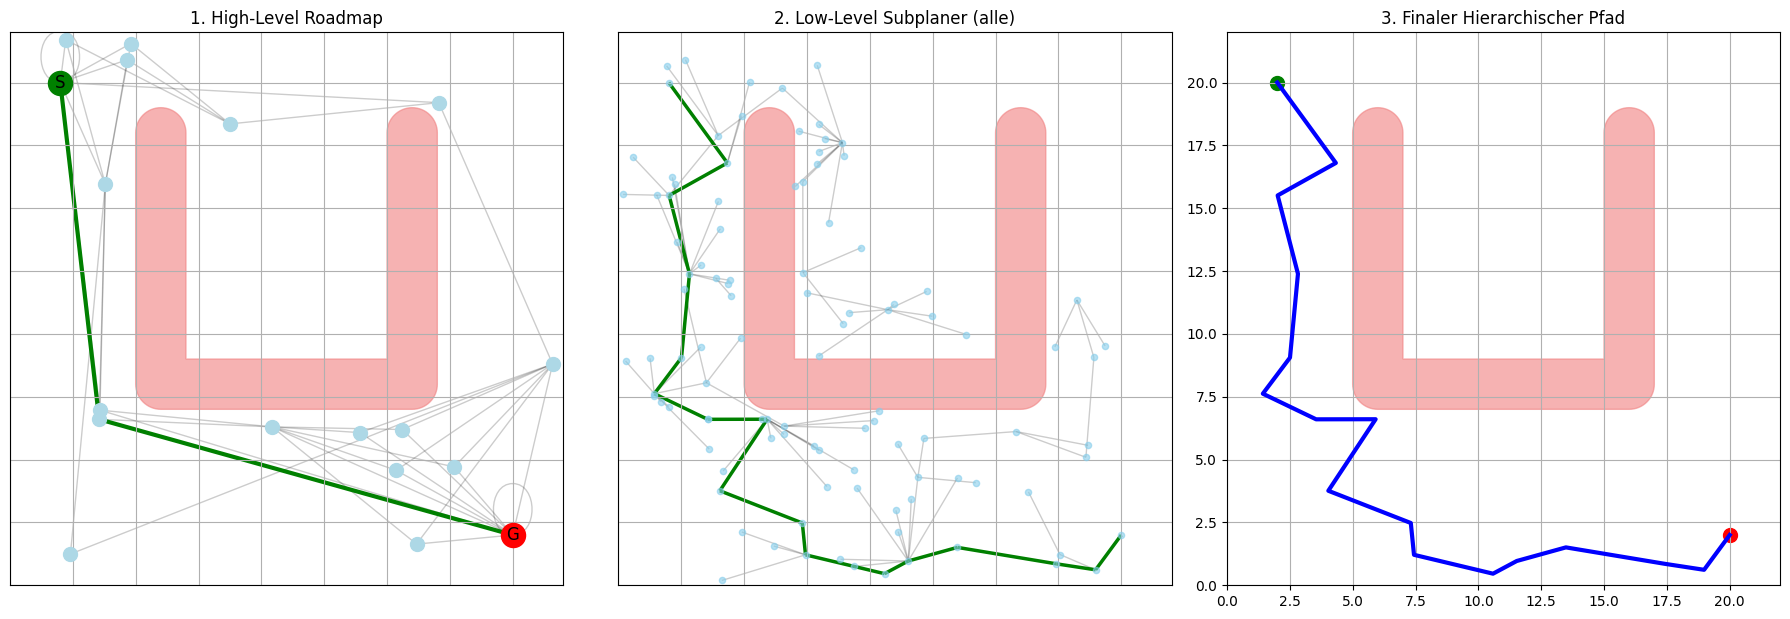

✅ Plot gespeichert: plots_hierarchical\U-Shape_Hierarchical-Basic.png

🔍 Szene: L-Shape
Globaler Pfad: ['start', 22, 2, 15, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([2.78682767, 3.69053398]), array([ 2.28626699, 19.05090371]), array([14.86592863, 19.32574376]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [2.78682767 3.69053398]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [2.78682767 3.69053398]
   Lokale Begrenzung (geclipped): ((np.float64(0.5287415021780466), np.float64(4.258086170713851)), (np.float64(0.9805946542268023), np.float64(4.709939322762606)))
Segment 1: [2.78682767 3.69053398] → [ 2.28626699 19.05090371]
→ Lokaler Planner für Segment 1: [2.78682767 3.69053398] → [ 2.28626699 19.05090371]
   Lokale Begrenzung (geclipped): ((0, np.float64(10.536547329230006)), (np.float64(3.3707188432451822), np.float64(19.370718843245182)))
Segment 2: [ 2.28626699 19.05090371] → [14.86592863 19.32574376]
→ Lokaler Planner für Segment 2: [ 2.28626699 19.05090371] → [14.8659286

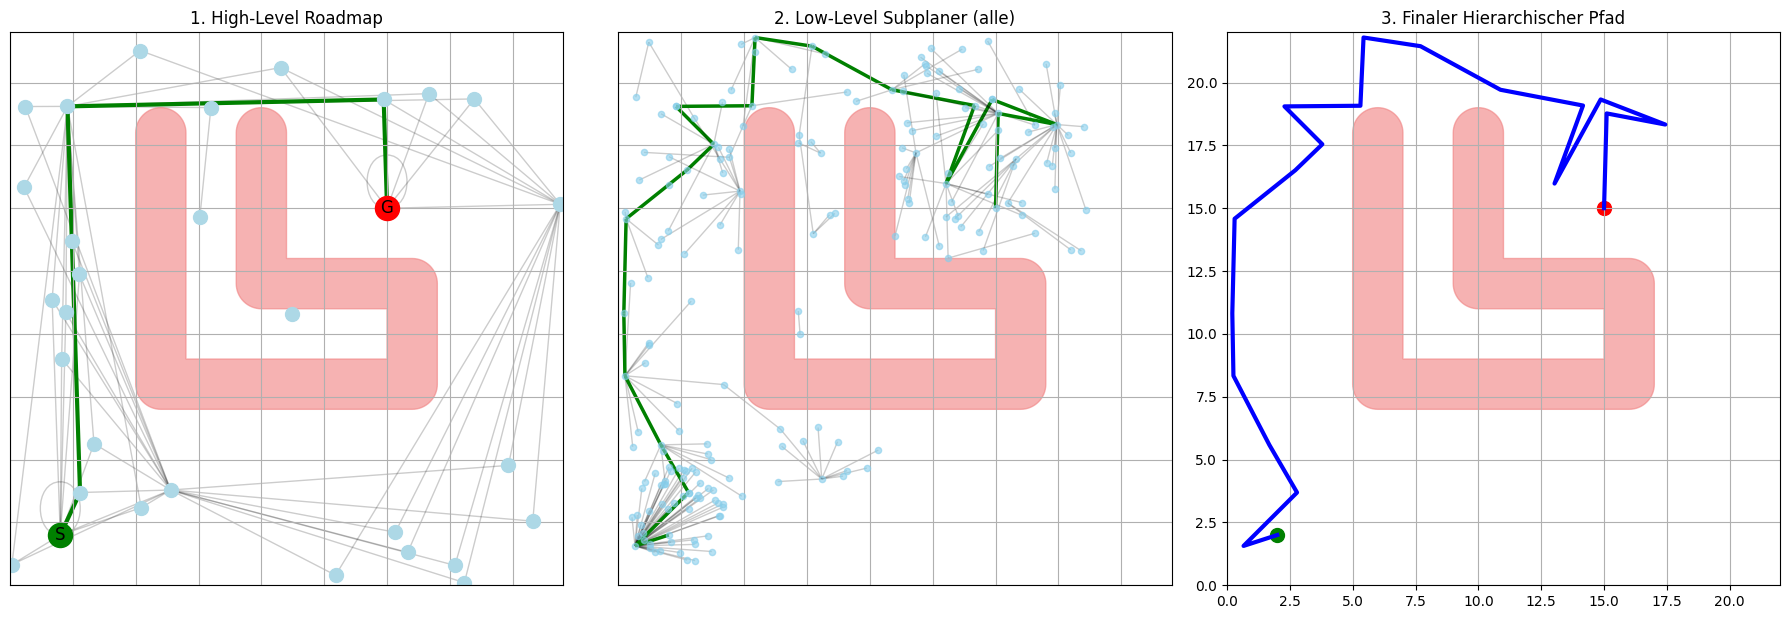

✅ Plot gespeichert: plots_hierarchical\L-Shape_Hierarchical-Basic.png

🔍 Szene: Corridor
Globaler Pfad: ['start', 0, 21, 16, 38, 1, 'goal']
Koordinaten des globalen Pfads: [[10.0, 5.0], array([6.43963327, 1.92469219]), array([1.17728509, 0.01388699]), array([2.68952429, 2.74622069]), array([ 1.36672355, 17.99848034]), array([ 5.67621744, 18.6606387 ]), [10.0, 15.0]]
Segment 0: [10.0, 5.0] → [6.43963327 1.92469219]
→ Lokaler Planner für Segment 0: [10.0, 5.0] → [6.43963327 1.92469219]
   Lokale Begrenzung (geclipped): ((np.float64(3.5151668790109944), np.float64(12.92446639550051)), (0, np.float64(8.166995853119584)))
Segment 1: [6.43963327 1.92469219] → [1.17728509 0.01388699]
→ Lokaler Planner für Segment 1: [6.43963327 1.92469219] → [1.17728509 0.01388699]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.406984425372992)), (0, np.float64(6.567814832151823)))
Segment 2: [1.17728509 0.01388699] → [2.68952429 2.74622069]
→ Lokaler Planner für Segment 2: [1.17728509 0.01388699] → [2.6

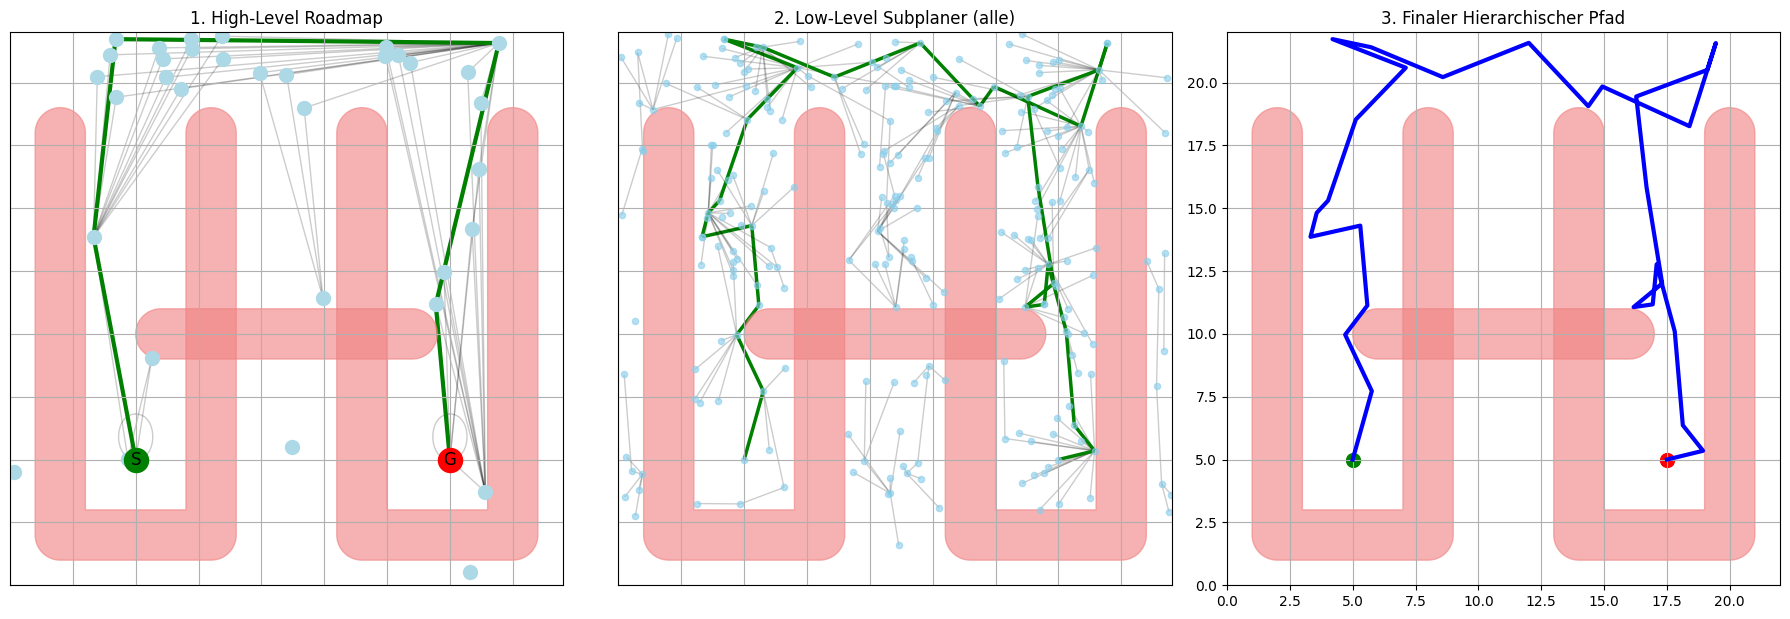

✅ Plot gespeichert: plots_hierarchical\Complex_Shape_Hierarchical-Basic.png

🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 61, 30, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([5.64369145, 0.14518641]), array([5.02141286, 6.65021668]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [5.64369145 0.14518641]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [5.64369145 0.14518641]
   Lokale Begrenzung (geclipped): ((0, np.float64(8.04355903806468)), (0, np.float64(5.294306516619708)))
Segment 1: [5.64369145 0.14518641] → [5.02141286 6.65021668]
→ Lokaler Planner für Segment 1: [5.64369145 0.14518641] → [5.02141286 6.65021668]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.867278582987751)), (0, np.float64(9.932427975530759)))
Segment 2: [5.02141286 6.65021668] → [5.0, 21.0]
→ Lokaler Planner für Segment 2: [5.02141286 6.65021668] → [5.0, 21.0]
   Lokale Begrenzung (geclipped): ((0, np.float64(13.010706427570721)), (np.float64(5.8251083415587), np.float64(21.8251083415587)))
✅

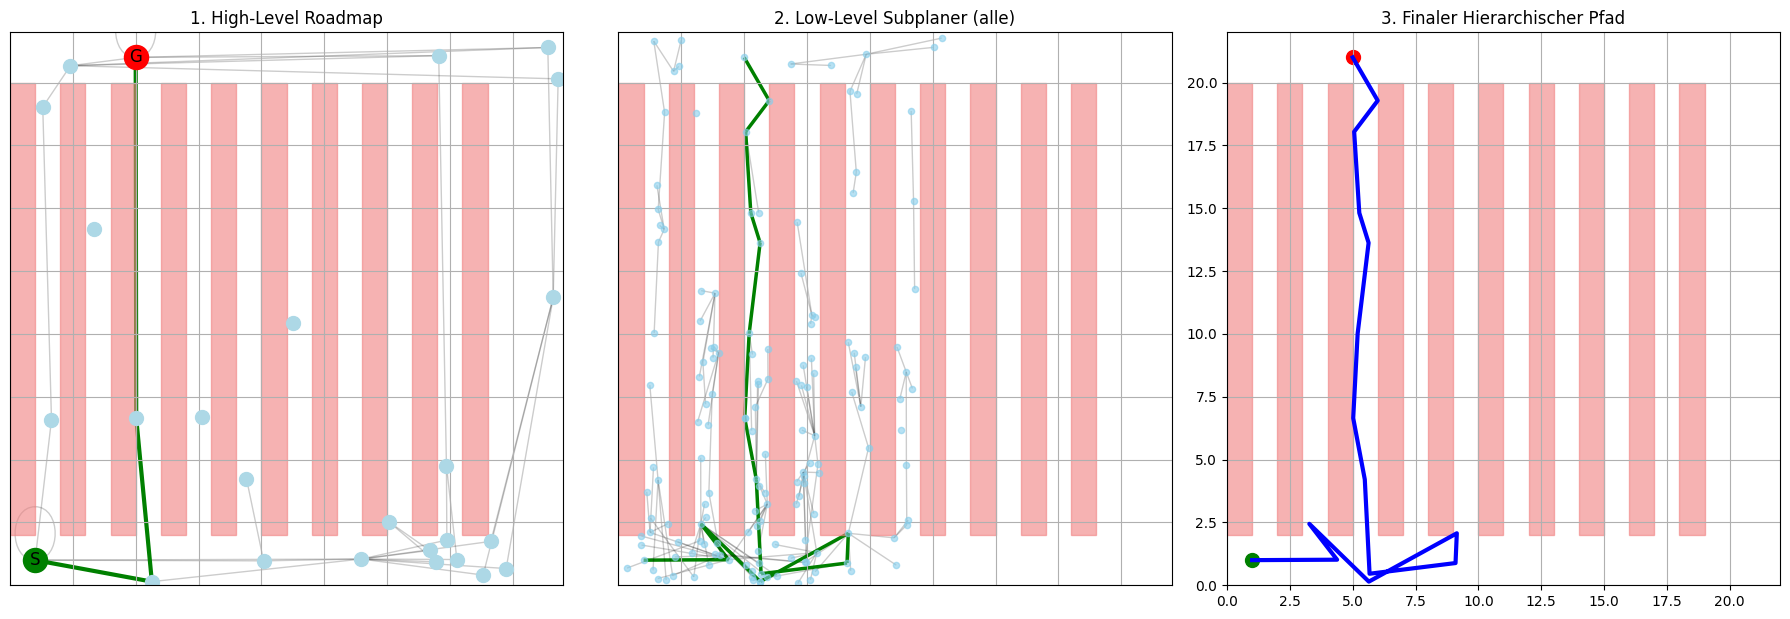

✅ Plot gespeichert: plots_hierarchical\Multiple_Obstacles_Hierarchical-Basic.png

🔍 Szene: Crossed Obstacles
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Crossed Obstacles

🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 2, 41, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([3.55685407, 0.8994089 ]), array([16.82400233, 10.79950588]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [3.55685407 0.8994089 ]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [3.55685407 0.8994089 ]
   Lokale Begrenzung (geclipped): ((0, np.float64(4.837259056485292)), (0, np.float64(3.5085364718367353)))
Segment 1: [3.55685407 0.8994089 ] → [16.82400233 10.79950588]
→ Lokaler Planner für Segment 1: [3.55685407 0.8994089 ] → [16.82400233 10.79950588]
   Lokale Begrenzung (geclipped): ((np.float64(2.1904282005733933), np.float64(18.190428200573393)), (0, np.float64(13.849457390219964)))
Segment 2: [16.82400233 10.79950588] → [19.0, 19.0]
→ Lokaler Planner für Segment 2: [16.82400

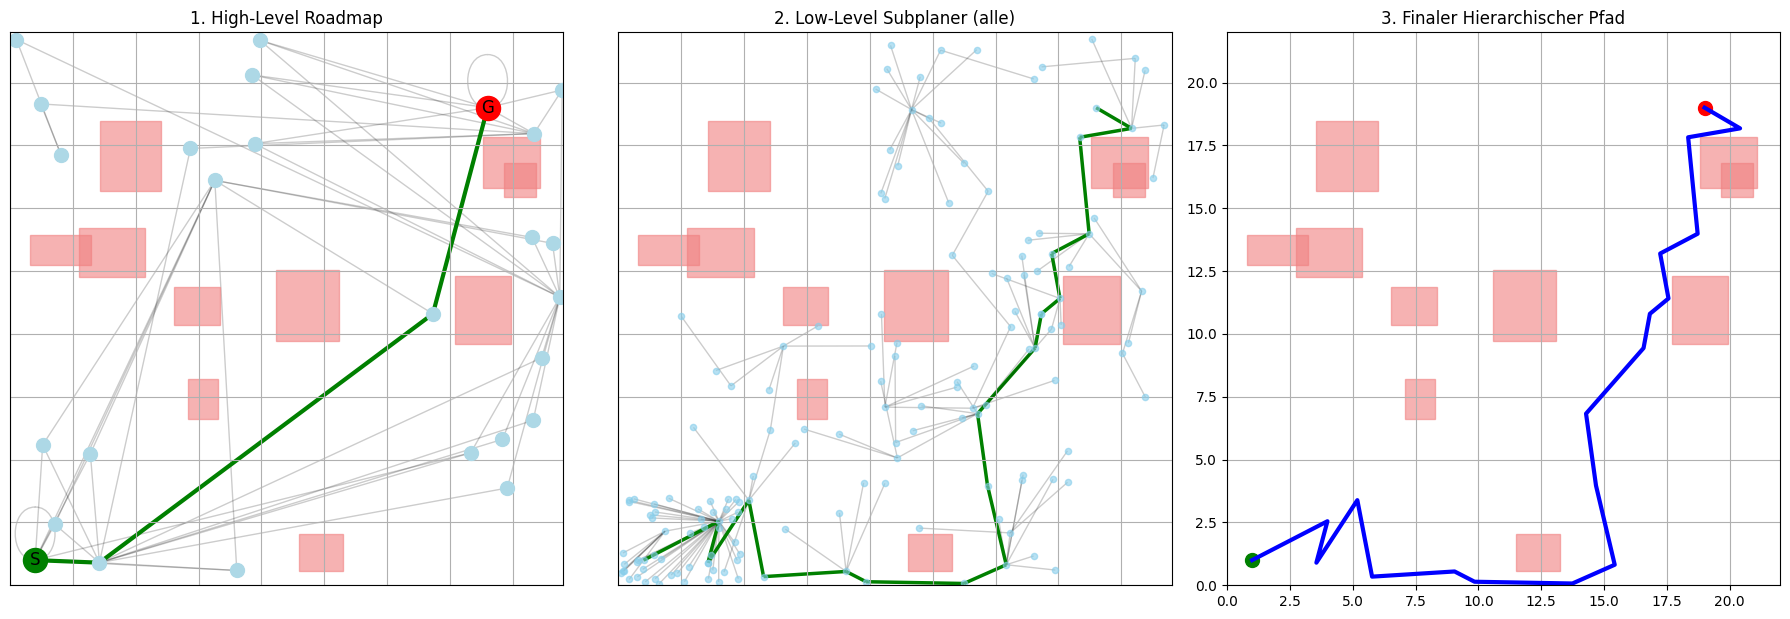

✅ Plot gespeichert: plots_hierarchical\Random_Obstacles_Hierarchical-Basic.png


In [3]:
import os
import matplotlib.pyplot as plt

# 📁 Ordner zum Speichern der Visualisierungen
output_dir = "plots_hierarchical"
os.makedirs(output_dir, exist_ok=True)

# ---- Alle Szenen durchlaufen + Benchmark ----
scenes = get_all_scenes()
results = []

for subplanner_type, config_low in [("Lazy", config_low_lazy), ("Basic", config_low_basic)]:
    print(f"\n🔁 Starte Benchmarks mit Subplanner: {subplanner_type}")

    for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
        print(f"\n🔍 Szene: {scene_name}")
        start = [list(start_pos)]
        goal = [list(goal_pos)]

        collision_checker = CollisionChecker(scene, limits)

        SubPlanner = LazyPRM if subplanner_type == "Lazy" else BasicPRM
        hier_planner = HierarchicalPlanner(
            scene=scene,
            limits=limits,
            GlobalPlannerClass=VisibilityPRM,
            LocalPlannerClass=SubPlanner,
            config_global=config_high,
            config_local=config_low
        )

        t0 = time.time()
        path = hier_planner.plan_path(start, goal)
        t1 = time.time()

        coords = hier_planner.get_solution_path() if path else []
        euclidean_length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:])) if coords else 0

        if not path:
            print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
            result = {
                "planner": f"Hierarchical-{subplanner_type}",
                "scene": scene_name,
                "hasPath": False,
                "length": 0,
                "euclidean_length": 0,
                "time": t1 - t0,
                "nodes": 0,
                "edges": 0,
                "roadmap_size": 0
            }
            results.append(result)
            continue

        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(path)}")

        hier_planner.solution_path = path
        hier_planner.graph = hier_planner.global_planner.graph

        # 🔍 Visualisierung + Speichern als Bild
        visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

        # 📸 Bild speichern
        filename = f"{scene_name}_Hierarchical-{subplanner_type}.png".replace(" ", "_")
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath)
        print(f"✅ Plot gespeichert: {filepath}")
        plt.close()  # Speicher freigeben

        result = {
            "planner": f"Hierarchical-{subplanner_type}",
            "scene": scene_name,
            "hasPath": True,
            "length": len(path),
            "euclidean_length": euclidean_length,
            "time": t1 - t0,
            "nodes": len(hier_planner.graph.nodes),
            "edges": len(hier_planner.graph.edges),
            "roadmap_size": hier_planner.graph.size()
        }
        results.append(result)


In [8]:
# Ergebnisse als DataFrame
result_df = pd.DataFrame(results)
print("\n📊 Benchmark-Ergebnisse:")
print(result_df)
# 📁 Ordner für Ergebnisdateien
results_dir = "benchmark_results"
os.makedirs(results_dir, exist_ok=True)

# Ergebnisse pro Algorithmus speichern
for planner_name, group_df in result_df.groupby("planner"):
    filename = f"{planner_name.replace(' ', '_')}_results.csv"
    filepath = os.path.join(results_dir, filename)
    group_df.to_csv(filepath, index=False)
    print(f"💾 Ergebnisse gespeichert: {filepath}")



📊 Benchmark-Ergebnisse:
               planner               scene  hasPath  length  euclidean_length  \
0    Hierarchical-Lazy             U-Shape     True      12         35.253841   
1    Hierarchical-Lazy             L-Shape     True      14         37.901572   
2    Hierarchical-Lazy            Corridor    False       0          0.000000   
3    Hierarchical-Lazy       Complex Shape     True      20         58.295400   
4    Hierarchical-Lazy  Multiple Obstacles    False       0          0.000000   
5    Hierarchical-Lazy   Crossed Obstacles    False       0          0.000000   
6    Hierarchical-Lazy    Random Obstacles     True       8         31.517056   
7   Hierarchical-Basic             U-Shape     True      18         41.521249   
8   Hierarchical-Basic             L-Shape     True      23         53.687362   
9   Hierarchical-Basic            Corridor    False       0          0.000000   
10  Hierarchical-Basic       Complex Shape     True      33         67.870035   
11 

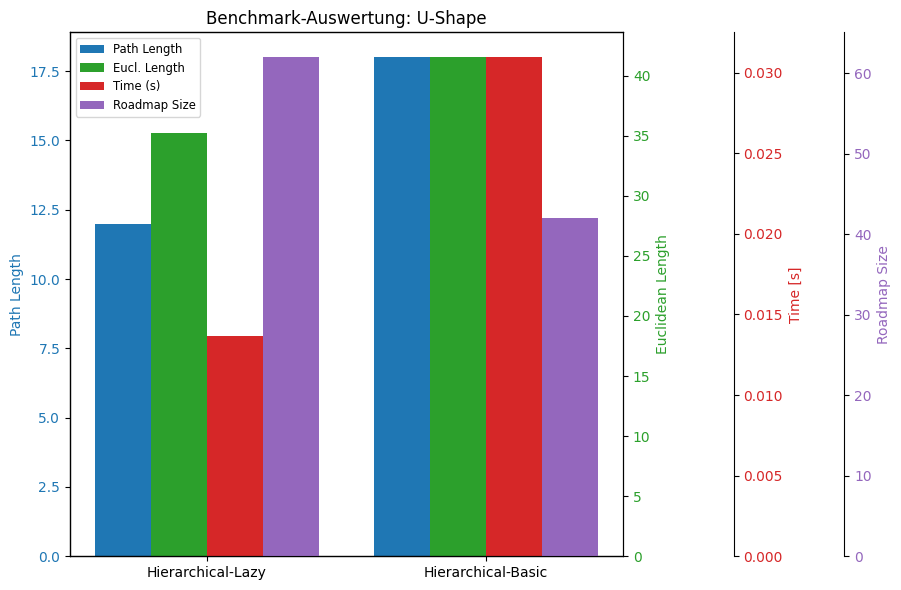

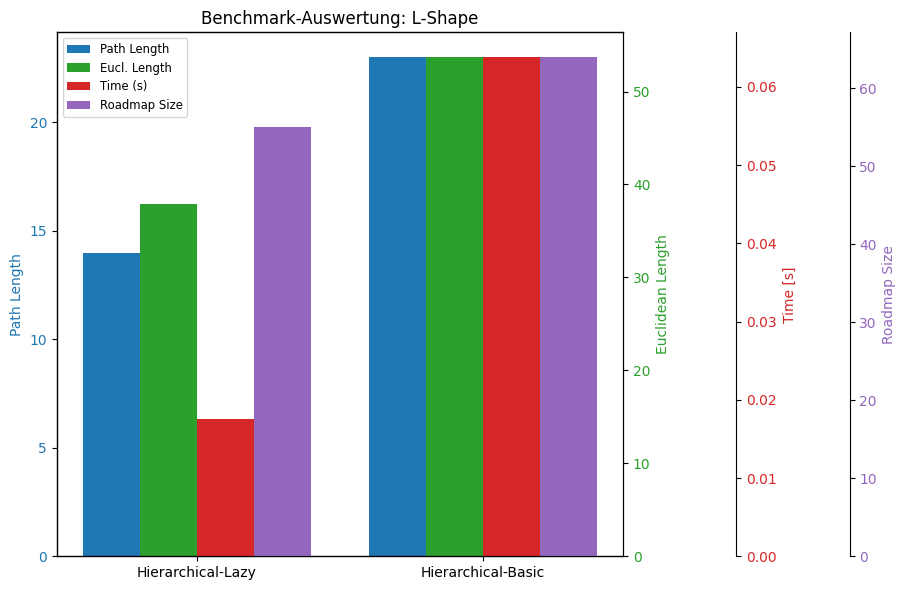

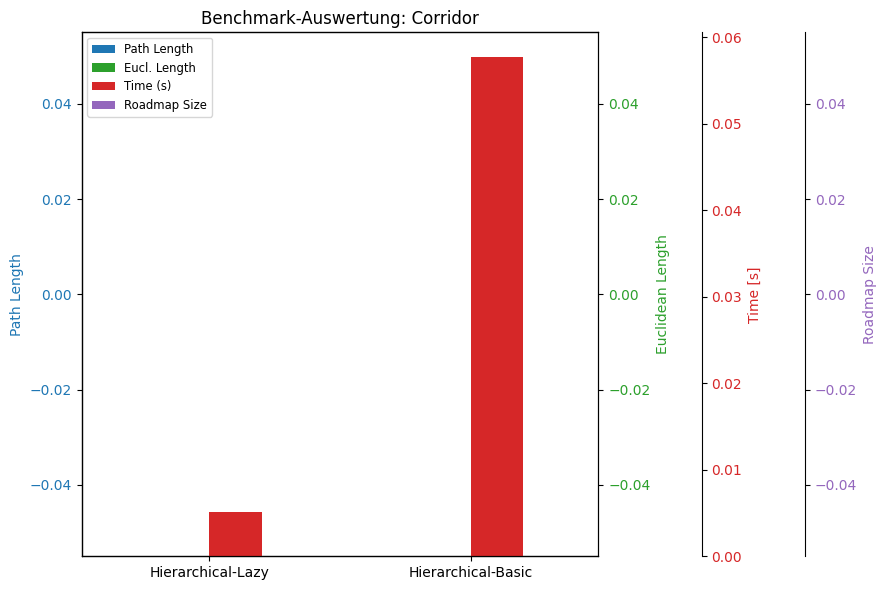

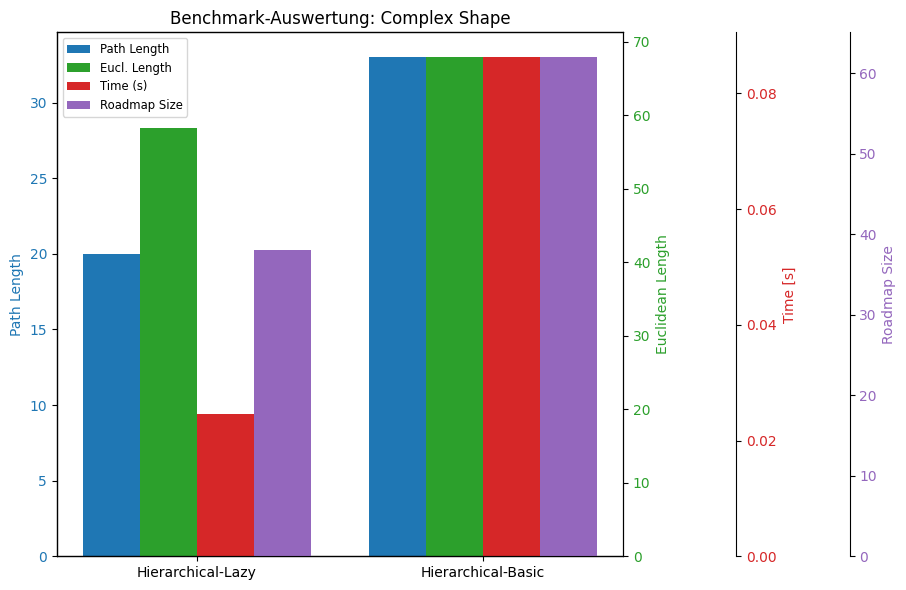

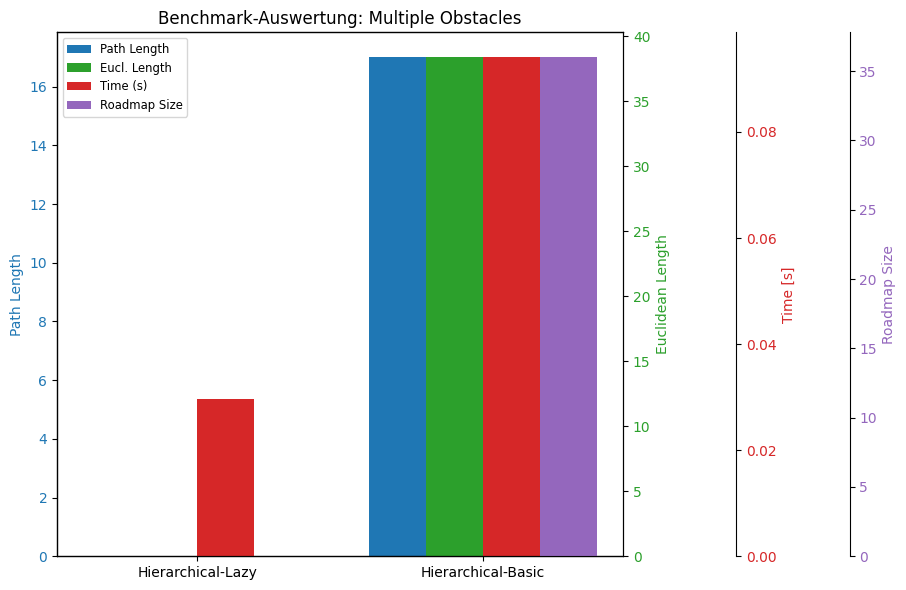

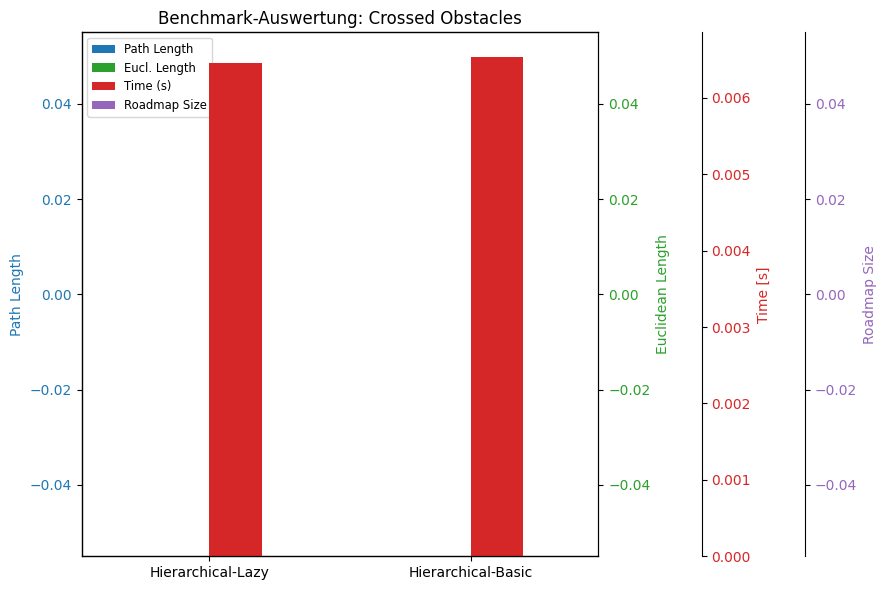

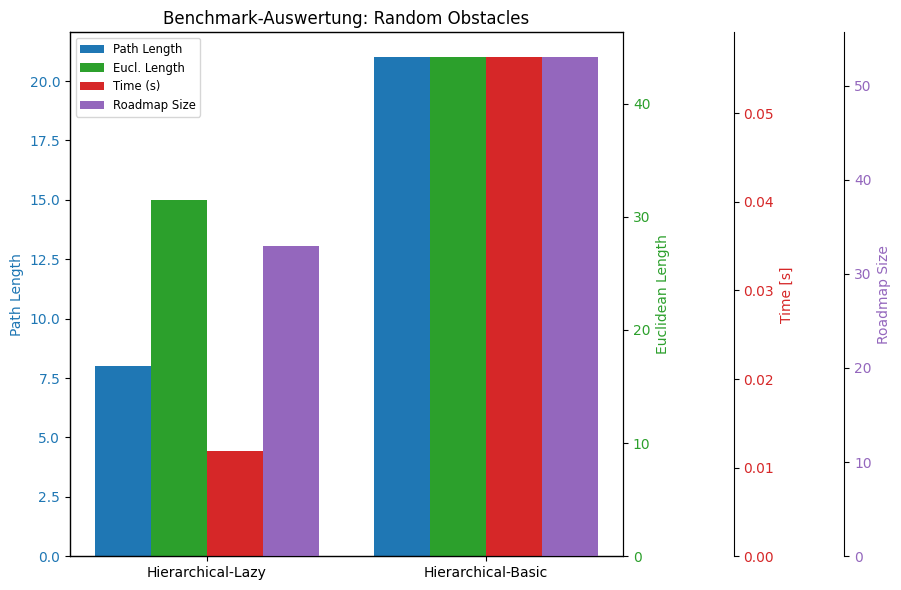

In [5]:
# Visualisierung
for scene in result_df["scene"].unique():
    df = result_df[result_df["scene"] == scene]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    width = 0.2
    idx = np.arange(len(df))

    ax1.bar(idx, df["length"], width, label="Path Length", color="#1f77b4")
    ax1.set_ylabel("Path Length", color="#1f77b4")
    ax1.tick_params(axis='y', labelcolor="#1f77b4")

    ax2 = ax1.twinx()
    ax2.bar(idx + width, df["euclidean_length"], width, label="Eucl. Length", color="#2ca02c")
    ax2.set_ylabel("Euclidean Length", color="#2ca02c")
    ax2.tick_params(axis='y', labelcolor="#2ca02c")

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.bar(idx + 2 * width, df["time"], width, label="Time (s)", color="#d62728")
    ax3.set_ylabel("Time [s]", color="#d62728")
    ax3.tick_params(axis='y', labelcolor="#d62728")

    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('axes', 1.4))
    ax4.bar(idx + 3 * width, df["roadmap_size"], width, label="Roadmap Size", color="#9467bd")
    ax4.set_ylabel("Roadmap Size", color="#9467bd")
    ax4.tick_params(axis='y', labelcolor="#9467bd")

    ax1.set_xticks(idx + 1.5 * width)
    ax1.set_xticklabels(df["planner"].values)
    ax1.set_title(f"Benchmark-Auswertung: {scene}")

    handles, labels = [], []
    for ax in [ax1, ax2, ax3, ax4]:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    ax1.legend(handles, labels, loc="upper left", fontsize="small")

    plt.tight_layout()
    plt.show()

Globaler Pfad: ['start', 6, 0, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([1.76650799, 7.46411756]), array([12.5604142 , 19.94531809]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [1.76650799 7.46411756]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [1.76650799 7.46411756]
   Lokale Begrenzung (geclipped): ((0, np.float64(7.892658754874914)), (0, np.float64(10.741463536828505)))
Segment 1: [1.76650799 7.46411756] → [12.5604142  19.94531809]
→ Lokaler Planner für Segment 1: [1.76650799 7.46411756] → [12.5604142  19.94531809]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.163461094924571)), (np.float64(5.704717824999843), np.float64(21.704717824999843)))
Segment 2: [12.5604142  19.94531809] → [19.0, 19.0]
→ Lokaler Planner für Segment 2: [12.5604142  19.94531809] → [19.0, 19.0]
   Lokale Begrenzung (geclipped): ((np.float64(9.271605741281299), 22), (np.float64(12.96405768940298), 22))
✅ Pfad gefunden mit 21 Punkten


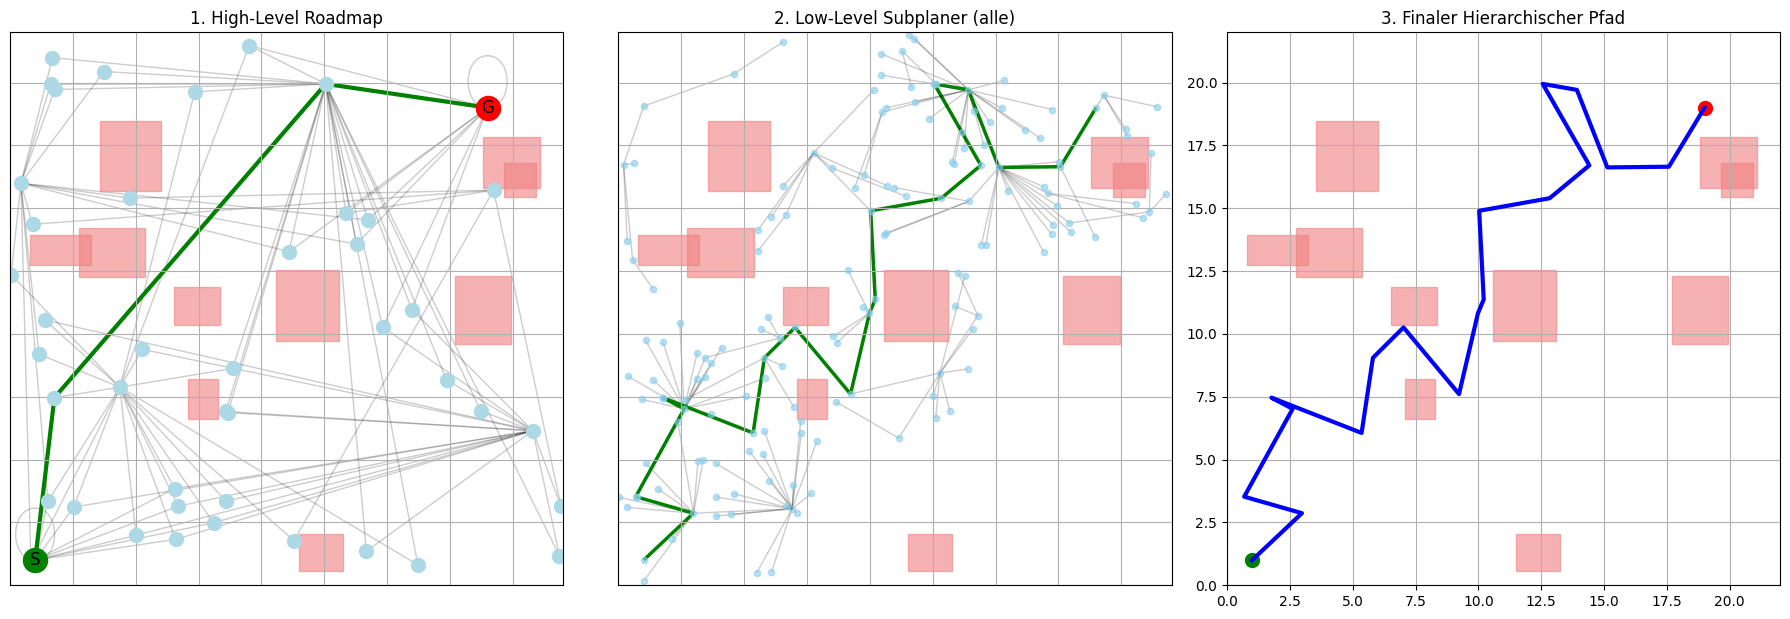

In [6]:
# --- Pfadplanung ---
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)


In [7]:
# --- Jede Szene durchlaufen ---
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen


🔄 Verarbeite Szene: U-Shape
Globaler Pfad: ['start', 42, 3, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([1.58352616, 9.32442397]), array([8.0097885 , 2.00217242]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [1.58352616 9.32442397]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [1.58352616 9.32442397]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.7917630786222)), (np.float64(6.662211986796727), 22))


KeyError: 'initialRoadmapSize'